# Setup

In [3]:
import os
import geopandas as gpd

In [2]:
# # update the wd path to be able to laod the module
os.chdir('../..')
os.getcwd()

'/home/weiqi_tori/GitHub/wri/cities-cif'

# Get Area of Interest

In [4]:
# load boundary from s3
boundary_path = 'https://cities-indicators.s3.eu-west-3.amazonaws.com/data/boundaries/boundary-BRA-Salvador-ADM4union.geojson'
city_gdf = gpd.read_file(boundary_path, driver='GeoJSON')
city_gdf.head()

/home/weiqi_tori/anaconda3/envs/fenv/lib/python3.10/site-packages/pyogrio/raw.py:196: RuntimeWarning: driver GeoJSON does not support open option DRIVER
  return ogr_read(


,geo_id,geo_level,geo_name,geo_parent_name,creation_date,geometry
0,BRA-Salvador_ADM4-union_1,ADM4-union,BRA-Salvador,BRA-Salvador,2022-08-03,"MULTIPOLYGON (((-38.50135 -13.01134, -38.5014 ..."


# Get Layer

In [ ]:
# Get Layer
from city_metrix.layers import Era5HottestDay
era_5_hottest_day = Era5HottestDay().get_data(city_gdf.total_bounds)

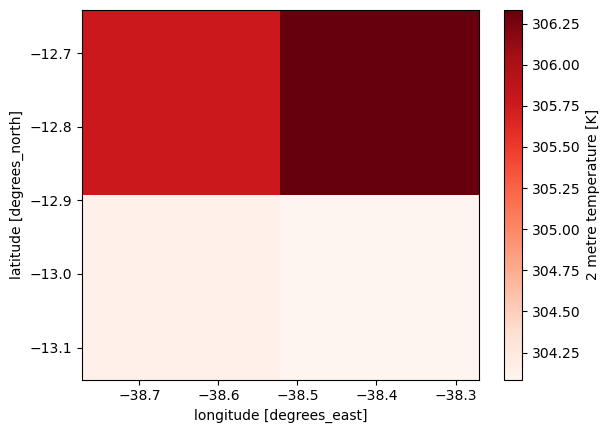

In [14]:
# Find the time step with the maximum temperature
max_temp_index = era_5_hottest_day['t2m'].argmax(dim='time')
max_time = era_5_hottest_day['t2m']['time'].isel(time=max_temp_index)

# Select the data corresponding to the maximum time and plot
era_5_hottest_day['t2m'].sel(time=max_time).plot(cmap='Reds')

# Save to file

In [16]:
# Create a data folder if it does not exist
if not os.path.exists('data'):
    os.makedirs('data')

In [19]:
# Save the era_5_hottest_day temperature to a tif file
era_5_hottest_day['t2m'].rio.to_raster(raster_path='data/era_5_hottest_day_t2m.tif', driver="COG")